## Web Crawling
- Web Browser를 사용하여 우리는 매일 필요한 정보를 인터넷에서 접하고 이를 사용하고 있다.
- 이러한 정보는 그 양이 대단히 많을 수 있고, 시간이 경과함에 따라 다이나믹하게 변할 수 있다
    - 따라서, Web Browser만으로 원하는 정보를 추출하는 것은 오랜 검색 시간이 필요하는 등 여러 한계가 있을 수 있다
    - 그러나, 컴퓨터 프로그램을 사용할 경우, 이러한 정보를 인터넷에서 손쉽게 자동으로 얻을 수 있다

### HTML (HyperText Markup Language)
- 확장자는 html, htm이며 Chrome과 같은 웹 브라우저에서 읽을 수 있는 웹 문서를 만들기 위한 언어이다
- **HTML**의 특성
    - Hypertext : 참조를 통해 독자가 한 문서에서 다른 문서로 즉시 접근할 수 있는 텍스트
    - Markup Language : 문서의 내용 뿐만 아니라, 태그 등을 이용하여 글자 크기, 모양 등 문서의 출력 형태까지 명기하는 언어의 한 가지이다
    - tag : 태그라고 하는 심볼을 사용하여 문서의 구조, 출력 형태 등을 조정한다
        - 태그는 '<>'를 사용하여 표시한다. 태그명으로 시작하고 끝내는데, 이 사이에 내용을 넣는다
        - 태그에는 태그의 성격을 구체화하는 속성을 부여할 수 있다
    - HTML 문서는 태그를 노드로 하는 **트리 구조**를 갖는다

### Tree 구조
<center><img src = "https://t1.daumcdn.net/cfile/tistory/251FE74B5100D04F2F" alt="My Image"></center>

- tree 구조는 Root node부터 child node를 가지는 자료 구조를 뜻한다
- 웹 문서는 트리 구조로 이뤄져 있는데, 탭을 생각하면 쉽다
- Machine Learning에서 Decision Tree와 연계되는 자료구조이므로, 기억해두면 좋다

### Web Scraping
- 웹 문서에서 원하는 데이터를 정제해서 추출할 수 있다
- 이를 위해서는 인터넷에서 문서를 읽어오고 이로부터 필요한 데이터를 추출하는 방법이 필요하다
- 본 강의에서는 이를 위한 가장 기본적인 방법을 소개한다

#### 인터넷에서 웹 문서를 읽는 방법
- 모듈 **urllib.request**의 함수 **urlopen**함수를 사용한다
    - 인수는 url즉, 인터넷 주소이다 (string)
    - HTTP Response라는 object를 반환한다
    - 이 object는 모듈 BeautifulSoup의 method **prettify( )**를 통해 HTML문서로 출력할 수 있다

In [2]:
from urllib.request import *
wp = urlopen('http://mail.sogang.ac.kr')
print(type(wp))

<class 'http.client.HTTPResponse'>


In [3]:
# pip install bs4
from bs4 import *
soup = BeautifulSoup(wp, 'html.parser')
print(type(soup))

<class 'bs4.BeautifulSoup'>


### 데이터 추출
- 모듈 **Beautiful Soup**을 사용한다
- Beautiful Soup은 HTML코드를 입력 받아, parsing을 통해 데이터 추출에 용이한 구조로 변환한다

In [4]:
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Frameset//EN" "http://www.w3.org/TR/html4/frameset.dtd">
<html>
 <head>
  <title>
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <link href="favicon.ico" rel="icon" type="image/x-icon"/>
  <link href="favicon.ico" rel="shortcut icon"/>
  <script type="text/javascript">
   function setTitleBar(title){
	document.title=title;
}
  </script>
 </head>
 <frameset border="0" cols="*" rows="*">
  <frame scrolling="auto" src="/common/welcome.do"/>
 </frameset>
</html>



### method find_all을 통한 자료 추출

In [5]:
html = '''
<!doctype html>
<head><title>An Example</title></head>
<body>
    <h3>The second heading (small font).</h3>
    <p>A paragraph(number list) :
        <b style = 'color:red'>123</b>, <b style = 'color:red'>365</b>, <b>641</b>, <b>387</b> </p>
    <p>Hyperlink : <a href='http://www.google.com'>google</a></p>
    <p>Link with italic: <a href='http://www.naver.com'><i>naver</i></a></p>
</body>'''

soup = BeautifulSoup(html, 'html.parser')

In [6]:
bList = soup.find_all('b') # tag가 b인 원소들의 리스트
for b in bList : print(b.get_text())

123
365
641
387


In [7]:
pList = soup.find_all('p') # tag가 b인 원소들의 리스트
for p in pList : print(p.get_text())

A paragraph(number list) :
        123, 365, 641, 387 
Hyperlink : google
Link with italic: naver


In [8]:
bList # bList의 실제 내용

[<b style="color:red">123</b>,
 <b style="color:red">365</b>,
 <b>641</b>,
 <b>387</b>]

In [9]:
pList

[<p>A paragraph(number list) :
         <b style="color:red">123</b>, <b style="color:red">365</b>, <b>641</b>, <b>387</b> </p>,
 <p>Hyperlink : <a href="http://www.google.com">google</a></p>,
 <p>Link with italic: <a href="http://www.naver.com"><i>naver</i></a></p>]

find all에서 속성까지 찾고 싶다면, 다음과 같은 방법으로 태그와 속성 및 속성 값을 포함시켜 얻을 수 있다

In [10]:
bList = soup.find_all('b', {'style' : 'color:red'}) # parameter는 dictionary 형태로 넣는다
print(bList[1].get_text())

365


methods find_all과 get_text는 아래와 같은 유형의 Beautiful Soup object들에 적용할 수 있다
- BeautifulSoup()의 반환 유형 : bs4.BeautifulSoup
- find_all()의 반환 유형 : bs4.element.ResultSet

#### 두 단계 이상을 거치기
- 두 단계 이상을 거쳐 태그가 b인 정수를 추출할 수도 있다

In [11]:
pList = soup.find_all('p')

bList = pList[0].find_all('b')
for b in bList : print(b.get_text()) # 차례로 출력

123
365
641
387


태그, 속성 등을 조합하여 원하는 자료를 다양하게 추출할 수 있다

### Method find
- find_all은 인수가 일치하는 **모든 항목**을 찾으나, find는 인수가 일치하는 첫 번째항목만을 찾아 반환한다
- find를 사용하면 속성 값도 얻을 수 있다

In [12]:
b = soup.find('b', {'style':''}) # tag가 b이고 style속성이 없는 첫 번째 정수
print(b.get_text())

641


In [13]:
# 태그가 a인 첫 번쨰 요소의 속성 href의 값
url = soup.find('a')['href']
print(url)

http://www.google.com


## Word Cloud

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
from bs4 import BeautifulSoup
import requests

In [20]:
# https://search.naver.com/search.naver?where=news&sm=tab_pge&query=검색어&start=페이지
                
search = '서강대'
page = [str(i) + '1' for i in range(50)]

In [21]:
news_title = ''
headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/100.0.48496.75" } 
# header 지정 안하면 서버에서 D-Dos로 인식해 차단이 될 수도 있다

for i in page :
    url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + search + "&start=" + str(i)
    original_html = requests.get(url, headers=headers)
    html = BeautifulSoup(original_html.text, "html.parser")
    articles = html.select("div.group_news > ul.list_news > li div.news_area > a")
    for k in articles:
        news_title += (k.attrs['title'] + ' ')

In [22]:
print(news_title) # text data

[튀르키예 강진] 서강대, 지진피해 모금 캠페인 축사하는 손병두 전 서강대 총장 어스얼라이언스, 서강대학교 김정호 교수 소속 계약 박은빈, 서강대 출신은 다르네… 잠깐 배운 외국어를 술술 서강대, 2023 캠퍼스타운 창업팀 선발대회 참가자 모집 서울 반도체학과 4곳, 정원 1.5배 이탈… “상당수 의대 간듯” 연대·고대·서강대 등 반도체학과 합격자 대다수 등록 포기  서강대 게임&평생교육원 부동산학전공 신입생 모집 2023정시 '이과 침공' 27.04% '확대'.. 서울대 53.75% 고대 46.77% 연대 67.42% 서강교육그룹, 경남 김해시 삼계동에 2번째 SLP어학원 개원 변협 "로스쿨 16곳 운영 부실"…경희대·서강대 '불인증' 곤혹스러운 한국언론학회, 한국언론정보학회, 한국방송학회 교수들 서강대학교 게임&평생교육원 부동산학 전공 신입생 모집 북한연구소 소장에 김영수 서강대 명예교수 [김동률의 아포리즘] 한국에서 대통령 부인으로 살아가기/서강대 교수(매체경영) [2023정시충원율] 서강대 5차추합 97% 609명 '축소'.. 인공지능학과 '최고' 컴퓨터공 경영 톱3 서강대, EBS와 메타버스플랫폼 구축 위한 업무협약 [2023정시충원율] 서강대 4차추합 87.4% 549명 '축소'.. 인공지능학과 '최고' 컴퓨터공 경영 톱3 ‘문과 침공’ 해소?…서강대·성균관대 자연계 지원 ‘문턱’ 낮춘다 명문대 인접 '대(학교)세권' 누리는 주거공간 '빌리브 디 에이블' [2023정시충원율] 상위 7개 대학 최종 추합 3744명 '증가'.. 충원율 44.1% '상승' [알고보자] 반도체 계약학과 2023정시충원율 155.3%가 반도체 위기의 근거?.. 작년 187.2%보다 오히려 '하락' [인터뷰] 서강대 교수 김영익 "코스피 상반기 2700 가능, 주식비중 늘려야" 자기소개서 전면 폐지…“수업 참여 태도·노력 중요성 커져” 2024학년도 대입 어떻게 바뀌나? 일부 대학 문·이과 빗장 푼다는데…"효과 미미할 것" 건국대, 학생-교직원 진로 고민 해결…‘KUCC’ 특

In [24]:
okt = Okt()
nouns = okt.nouns(news_title) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 사전 데이터를 구함

FileNotFoundError: [Errno 2] JVM DLL not found: /Library/Java/JavaVirtualMachines/jdk-17.jdk/Contents/Home/lib/libjli.dylib


(-0.5, 1999.5, 1599.5, -0.5)

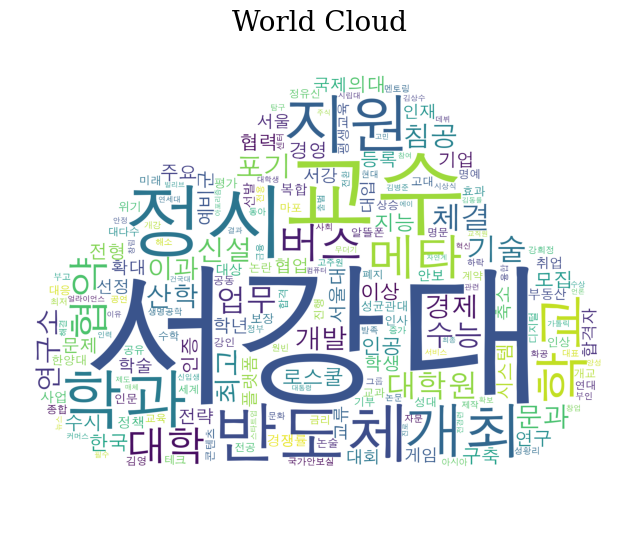

In [16]:
im = Image.open('cloud.png') 
mask_arr = np.array(im) 

wc = WordCloud(font_path='AppleGothic', width=400, height=400, scale=2.0, max_font_size=250, mask = mask_arr, background_color = 'white')
gen = wc.generate_from_frequencies(c)
plt.figure(figsize = (8, 8))
plt.imshow(gen)
plt.title("World Cloud", fontsize = 20, fontfamily = 'Serif')
plt.axis('off')

In [17]:
max_item = c.most_common(40)

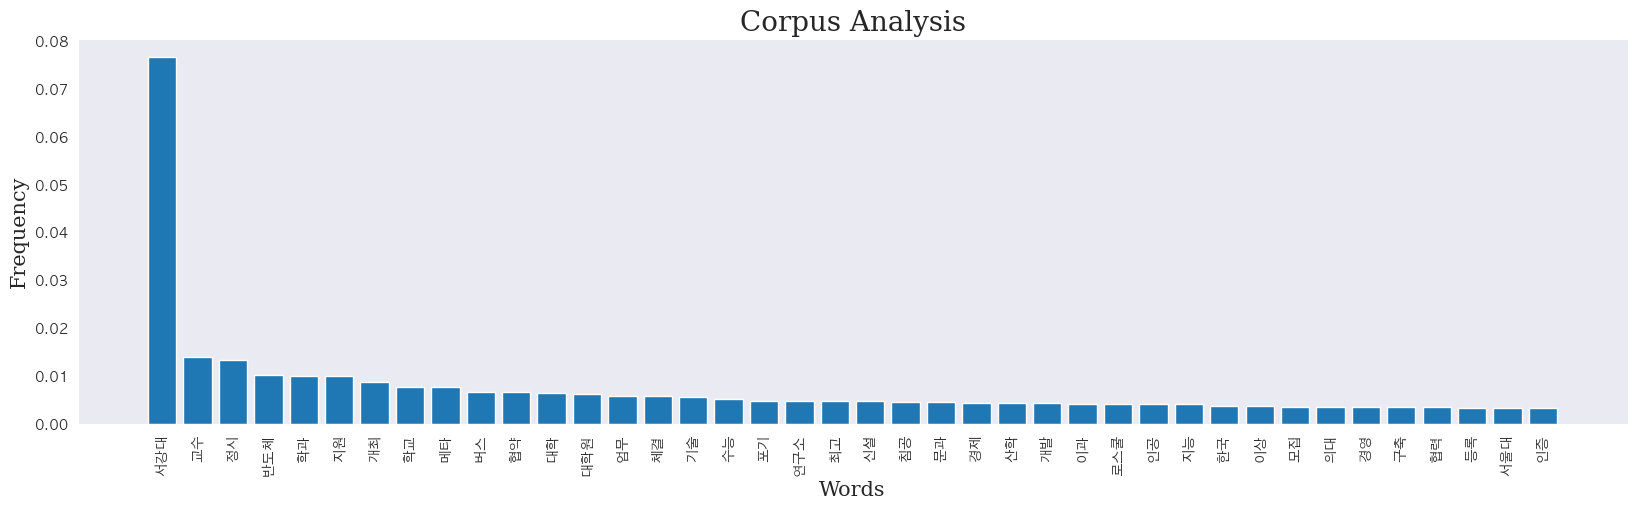

In [18]:
import pandas as pd
import seaborn as sns
sns.set_style('dark')
plt.figure(figsize = (20,5))
plt.rc('font', family = 'AppleGothic')
plt.bar(pd.Series(dict(max_item)).index, pd.Series(dict(max_item)).values/len(words))
plt.xticks(rotation = 90)
plt.ylabel('Frequency', fontsize = 15, fontfamily = 'Serif')
plt.xlabel('Words', fontsize = 15, fontfamily = 'Serif')
plt.title('Corpus Analysis', fontsize = 20, fontfamily = 'Serif')
plt.show()

수집된 데이터들은 BERT나 별도의 embedding을 통해서 가공이 가능하다